# Welcome
## In this notebook you will find...
## 1. EDA
## 2. Experimentation with various classifiers, including TF Keras ANNs, to find the best one for this dataset 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


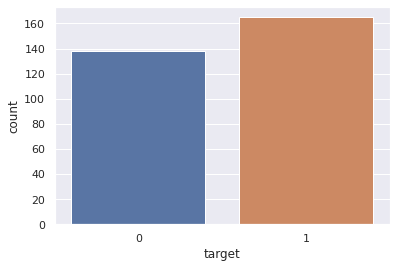

In [6]:
sns.countplot(df['target'])

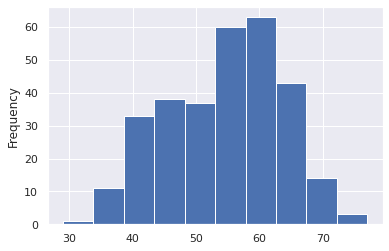

In [7]:
df['age'].plot(kind='hist')

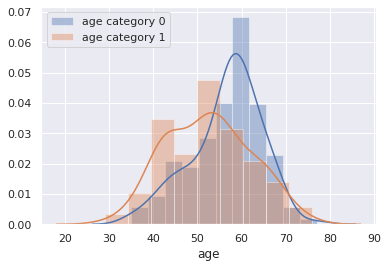

In [8]:
age_tgt_0 = df[df['target'] == 0]['age']
age_tgt_1 = df[df['target'] == 1]['age']

#f, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.distplot(age_tgt_0, label='age category 0')
sns.distplot(age_tgt_1, label='age category 1')
plt.legend()
plt.show()

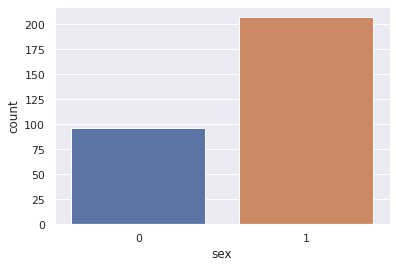

In [9]:
# sex - (1 = male; 0 = female)

sns.countplot(df['sex'])

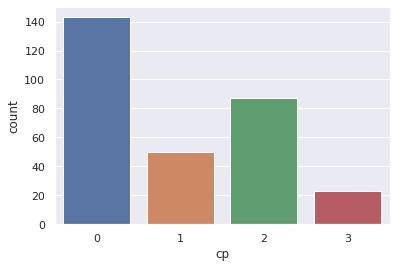

In [10]:
# cp - chest pain type

sns.countplot(df['cp'])

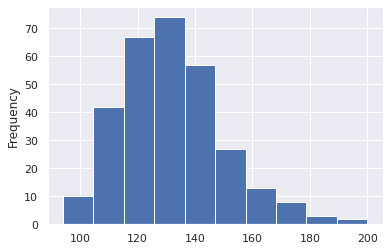

In [11]:
# trestbps - resting blood pressure (in mm Hg on admission to the hospital)

df['trestbps'].plot(kind='hist')

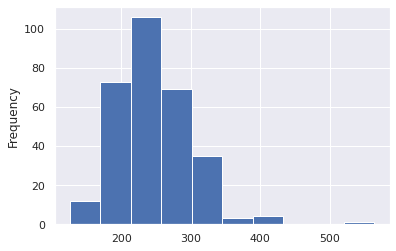

In [12]:
# chol - serum cholestoral in mg/dl

df['chol'].plot(kind='hist')

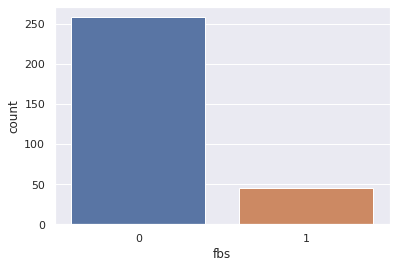

In [13]:
# fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

sns.countplot(df['fbs'])

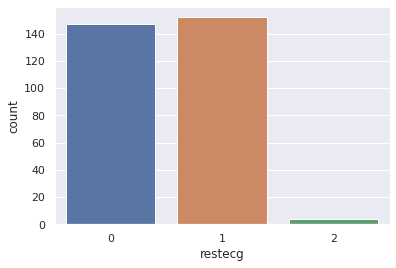

In [14]:
# restecg - resting electrocardiographic results

sns.countplot(df['restecg'])

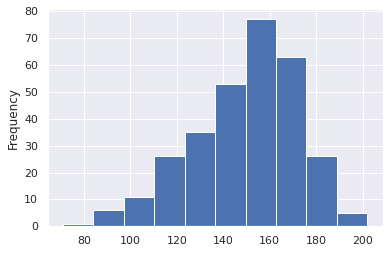

In [15]:
# thalach - maximum heart rate achieved

df['thalach'].plot(kind='hist')

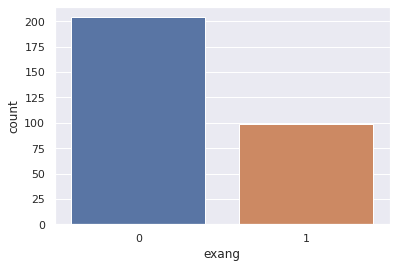

In [16]:
# exang - exercise induced angina (1 = yes; 0 = no)

sns.countplot(df['exang'])

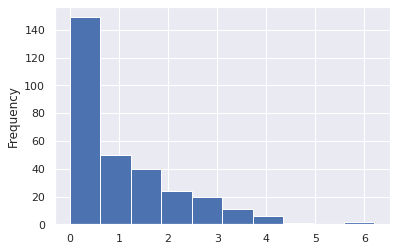

In [17]:
# oldpeak - ST depression induced by exercise relative to rest

df['oldpeak'].plot(kind='hist')

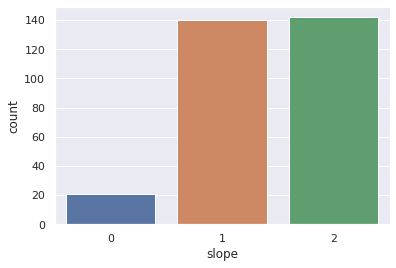

In [18]:
# slop - ethe slope of the peak exercise ST segment

sns.countplot(df['slope'])

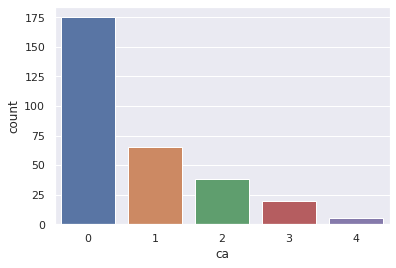

In [19]:
# ca - number of major vessels (0-3) colored by flourosopy

sns.countplot(df['ca'])

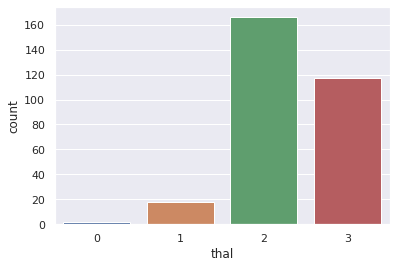

In [20]:
# thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

sns.countplot(df['thal'])

In [21]:
# Exploring gender differences

male_df = df[df['sex'] == 1]
female_df = df[df['sex'] == 0]

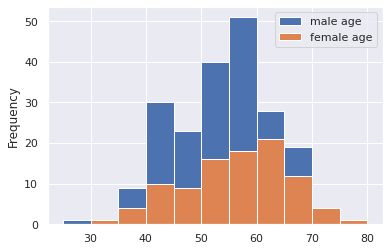

In [22]:
bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
male_df['age'].plot(kind='hist', label='male age', bins=bins)
female_df['age'].plot(kind='hist', label='female age', bins=bins)
plt.legend()

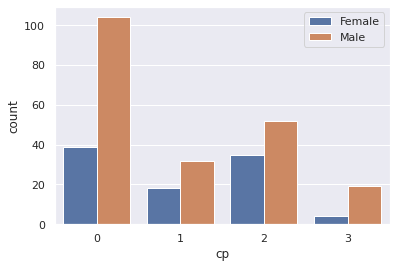

In [23]:
# Males get more heartache

sns.countplot(x='cp', data=df, hue='sex')
#sns.countplot(female_df['cp'], label='chest pain femaile')
plt.legend(labels=['Female', 'Male'])
plt.show()

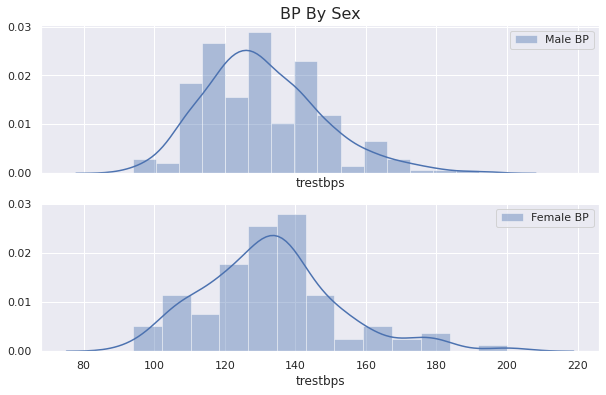

In [24]:
figure, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 6))
sns.distplot(male_df['trestbps'], ax=axs[0])
axs[0].legend(['Male BP'])
sns.distplot(female_df['trestbps'], ax=axs[1], )
axs[1].legend(['Female BP'])
axs[0].set_title('BP By Sex', size=16)
plt.show()

Text(0.5, 0, 'serum cholestoral in mg/dl')

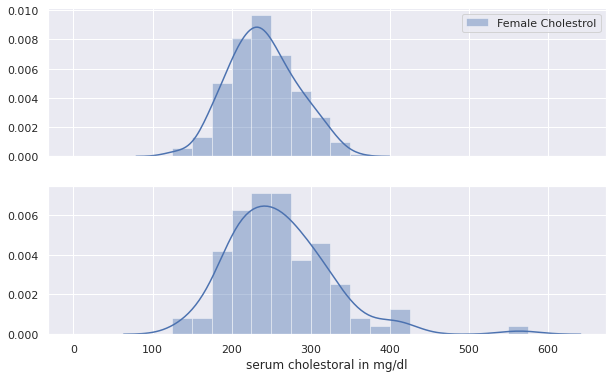

In [25]:
bins = np.linspace(0, 600, 25, dtype='int')

fig, axs = plt.subplots(2, figsize=(10, 6), sharex=True)

sns.distplot(male_df['chol'], ax=axs[0], bins=bins)
axs[0].legend(['Male Cholestrol'])
axs[0].set_xlabel('')

sns.distplot(female_df['chol'], ax=axs[1], bins=bins)
axs[0].legend(['Female Cholestrol'])
axs[1].set_xlabel('serum cholestoral in mg/dl')

Text(0.5, 0, 'fasting blood sugar > 120 mg/dl \n 1 = true; 0 = false')

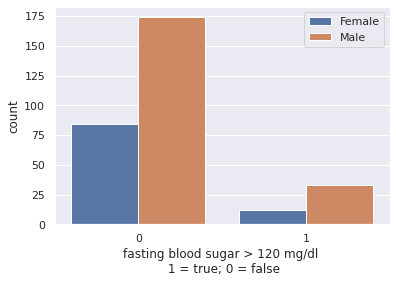

In [26]:
sns.countplot(x='fbs', hue='sex', data=df)
plt.legend(['Female', 'Male'])
plt.xlabel('fasting blood sugar > 120 mg/dl \n 1 = true; 0 = false')

Text(0.5, 0, 'resting electrocardiographic results')

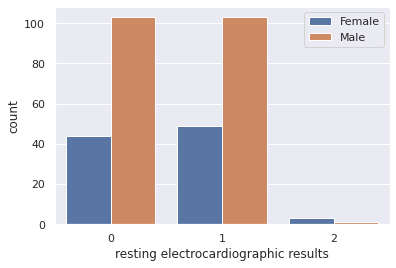

In [27]:
sns.countplot(x='restecg', hue='sex', data=df)
plt.legend(['Female', 'Male'])
plt.xlabel('resting electrocardiographic results')

Text(0.5, 0, 'maximum heart rate achieved')

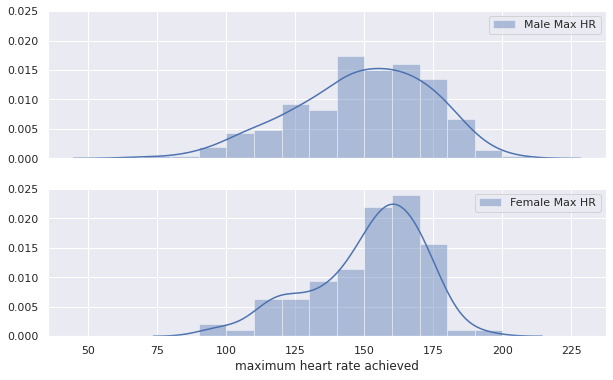

In [28]:
bins = np.linspace(50, 220, 18)

fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(10, 6))

sns.distplot(male_df['thalach'], ax=axs[0], bins=bins)
axs[0].legend(['Male Max HR'])
axs[0].set_xlabel('')

sns.distplot(female_df['thalach'], ax=axs[1], bins=bins)
axs[1].legend(['Female Max HR'])
axs[1].set_xlabel('maximum heart rate achieved')

Text(0.5, 0, 'exercise induced angina \n (1 = yes; 0 = no)')

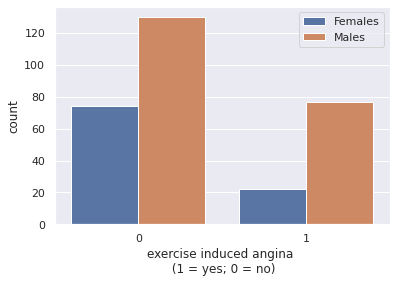

In [29]:
sns.countplot(x='exang', hue='sex', data=df)
plt.legend(['Females', 'Males'])
plt.xlabel('exercise induced angina \n (1 = yes; 0 = no)')

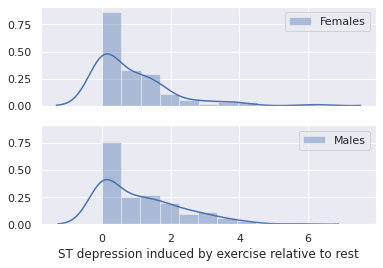

In [30]:
fig, axs = plt.subplots(2, sharex=True, sharey=True)

sns.distplot(female_df['oldpeak'], ax=axs[0])
sns.distplot(male_df['oldpeak'], ax=axs[1])
axs[0].legend(['Females'])
axs[1].legend(['Males'])
axs[0].set_xlabel('')
axs[1].set_xlabel('ST depression induced by exercise relative to rest')
plt.show()

Text(0.5, 0, 'the slope of the peak exercise ST segment')

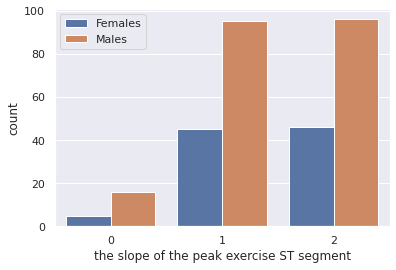

In [31]:
sns.countplot(x='slope', hue='sex', data=df)
plt.legend(['Females', 'Males'])
plt.xlabel('the slope of the peak exercise ST segment')

Text(0.5, 0, 'number of major vessels (0-3) colored by flourosopy')

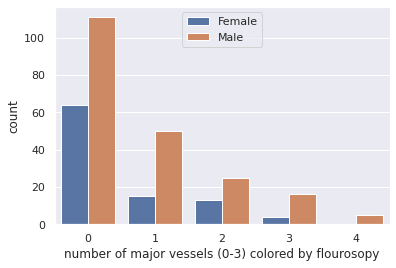

In [32]:
ax = sns.countplot(x='ca', hue='sex', data=df)
ax.legend(['Female', 'Male'])
ax.set_xlabel('number of major vessels (0-3) colored by flourosopy')

Text(0.5, 0, '3 = normal; 6 = fixed defect; 7 = reversable defect')

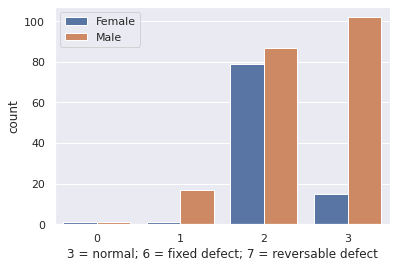

In [33]:
ax = sns.countplot(x='thal', hue='sex', data=df)
ax.legend(['Female', 'Male'])
ax.set_xlabel('3 = normal; 6 = fixed defect; 7 = reversable defect')

In [34]:
# Converting categorical variables to data type string, so onehotencoding 
# can be applied or dummy variables can be created

df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']] = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].astype('str')

df_dumms = pd.get_dummies(df, drop_first=True)

In [35]:
X = df_dumms.drop(columns='target').values
y = df_dumms['target'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [37]:
logreg = LogisticRegression()

grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
       'C' : [1, 10, 100, 1000], 'solver' : ['liblinear', 'lbfgs']}

gsearch = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, 
                       cv=5, verbose=True)

In [38]:
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [39]:
gsearch.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [40]:
logestic_regression = LogisticRegression(**gsearch.best_params_)

logestic_regression.fit(X_train, y_train)

log_reg_preds = logestic_regression.predict(X_test)

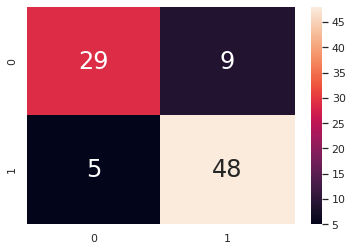

In [41]:
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
sns.heatmap(log_reg_cm, annot=True, annot_kws={'size':24})

In [42]:
log_reg_accu = accuracy_score(y_test, log_reg_preds)
print('The Logestic Regression model achieved an accuracy score of {}'.format(log_reg_accu))

The Logestic Regression model achieved an accuracy score of 0.8461538461538461


In [43]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_preds = gnb.predict(X_test)

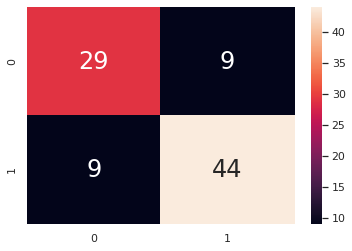

In [44]:
gnb_cm = confusion_matrix(y_test, gnb_preds)

sns.heatmap(gnb_cm, annot=True, annot_kws={'size':24})

In [45]:
gnb_accu = accuracy_score(y_test, gnb_preds)
print('The Gaussian NB Classifier accuracy score is {}'.format(gnb_accu))

The Gaussian NB Classifier accuracy score is 0.8021978021978022


In [46]:
dtree = DecisionTreeClassifier()

dtree_grid = {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 
             'min_samples_split' : [20, 25, 30, 35, 40, 50]}

gsearch = GridSearchCV(dtree, param_grid=dtree_grid, n_jobs=-1, cv=5, verbose=True)

gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [47]:
dec_tree = DecisionTreeClassifier(**gsearch.best_params_)

dec_tree.fit(X_train, y_train)

dtree_preds = dec_tree.predict(X_test)

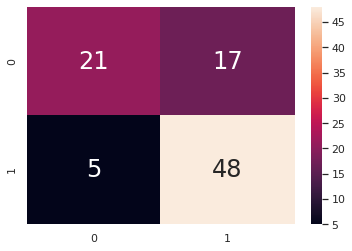

In [48]:
dtree_cm = confusion_matrix(y_test, dtree_preds)

sns.heatmap(dtree_cm, annot=True, annot_kws={'size':24})

In [49]:
dtree_acc = accuracy_score(y_test, dtree_preds)
print('The Decesion Tree model yielded an accuracy of {}'.format(dtree_acc))

The Decesion Tree model yielded an accuracy of 0.7582417582417582


In [50]:
rf = RandomForestClassifier()

grid = {'n_estimators' : [18, 20, 22], 
       'criterion' : ['gini'], 'min_samples_split' : [8, 10, 12, 15], 
       'min_samples_leaf' : [7, 8, 9], 'max_depth' : [12, 15, 18], 
       'max_features' : [1, 2]}

gridsearch = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=5, verbose=3)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   19.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [51]:
rf_clf = RandomForestClassifier(**gridsearch.best_params_)

rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_test)

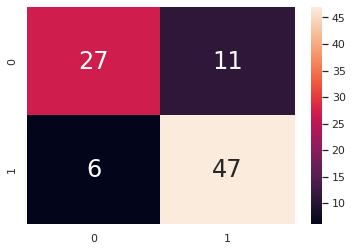

In [52]:
rf_cm = confusion_matrix(y_test, rf_preds)

sns.heatmap(rf_cm, annot=True, annot_kws={'size':24})

In [53]:
rf_accu = accuracy_score(y_test, rf_preds)

print('The Random Forest Classifier model yielded an accuracy of {}'.format(rf_accu))

The Random Forest Classifier model yielded an accuracy of 0.8131868131868132


In [54]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [55]:
knn = KNeighborsClassifier()

knn_grid = {'n_neighbors' : [13, 15, 17, 19],
            'weights' : ['distance'],
            'algorithm' : ['auto'],
            'leaf_size' : [2, 3, 5, 7, 9],
            'metric' : ['manhattan']}

gs = GridSearchCV(estimator=knn, param_grid=knn_grid, n_jobs=-1, verbose=3)

gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [2, 3, 5, 7, 9],
                         'metric': ['manhattan'],
                         'n_neighbors': [13, 15, 17, 19],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [56]:
knn_clf = KNeighborsClassifier(**gs.best_params_)
knn_clf.fit(X_train_scaled, y_train)
knn_preds = knn_clf.predict(X_test_scaled)

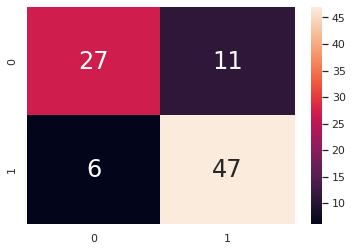

In [57]:
knn_cm = confusion_matrix(y_test, knn_preds)

sns.heatmap(knn_cm, annot=True, annot_kws={'size':24})

In [58]:
knn_acc = accuracy_score(y_test, knn_preds)

print('KNN accuracy score is {}'.format(knn_acc))

KNN accuracy score is 0.8131868131868132


In [59]:
svc = SVC()

svc_grid = {'C' : [0.1, 1.0, 10.0],
            'kernel' : ['rbf', 'linear'],
            'gamma' : [0.00001, 0.0001, 0.001, 0.01]}

svc_gs = GridSearchCV(estimator=svc, param_grid=svc_grid, n_jobs=-1, verbose=3)

svc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  72 out of 120 | elapsed:    4.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   27.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [60]:
svm_clf = SVC(**svc_gs.best_params_)

svm_clf.fit(X_train, y_train)

svm_preds = svm_clf.predict(X_test)

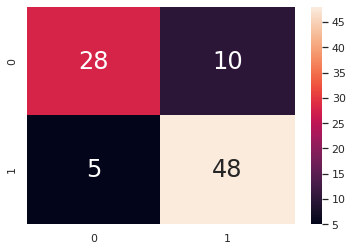

In [61]:
svm_cm = confusion_matrix(y_test, svm_preds)

sns.heatmap(svm_cm, annot=True, annot_kws={'size':24})

In [62]:
svm_accu = accuracy_score(y_test, svm_preds)

print('The SVM Classifier achieved an accuracy score of {}'.format(svm_accu))

The SVM Classifier achieved an accuracy score of 0.8351648351648352


In [63]:
gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)

gpc_preds = gpc.predict(X_test)

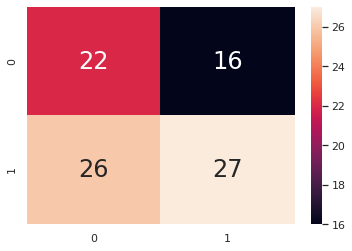

In [64]:
gpc_cm = confusion_matrix(y_test, gpc_preds)

sns.heatmap(gpc_cm, annot=True, annot_kws={'size' : 24})

In [65]:
gpc_accu = accuracy_score(y_test, gpc_preds)

print('The GP Classifier had an accuracy score of {}'.format(gpc_accu))

The GP Classifier had an accuracy score of 0.5384615384615384


In [66]:
mlp = MLPClassifier()

mlp_grid = {'hidden_layer_sizes' : [(7, 3), (8, 4, 2), (14, 7, 3), (10,), (7,), (4,)],
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'alpha' : [0.00001, 0.0001, 0.001],
            'learning_rate' : ['constant', 'invscaling', 'adaptive']}

mlp_gs = GridSearchCV(estimator=mlp, param_grid=mlp_grid, n_jobs=-1, verbose=4)

mlp_gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 1740 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2378 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3112 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  2.3min finished
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [1e-05, 0.0001, 0.001],
                         'hidden_layer_sizes': [(7, 3), (8, 4, 2), (14, 7, 3),
                      

In [67]:
mlp_cls = MLPClassifier(**mlp_gs.best_params_)

mlp_cls.fit(X_test_scaled, y_test)

mlp_preds = mlp_cls.predict(X_test_scaled)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


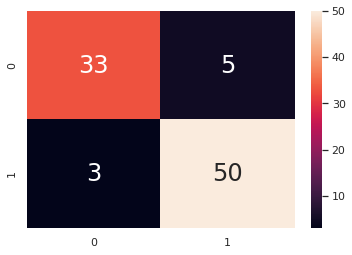

In [68]:
mlp_cm = confusion_matrix(y_test, mlp_preds)

sns.heatmap(mlp_cm, annot=True, annot_kws={'size' : 24})

In [69]:
mlp_accu = accuracy_score(y_test, mlp_preds)

print('MLPClassifier achieved an accuracy score of {}'.format(mlp_accu))

MLPClassifier achieved an accuracy score of 0.9120879120879121


In [70]:
model = Sequential()

model.add(Dense(units=12, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=4, activation='relu'))
#model.add(Dropout(0.25))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(x=X_train_scaled, y=y_train, epochs=1000, callbacks=[early_stopping], 
          validation_data=(X_test_scaled, y_test))

Train on 212 samples, validate on 91 samples
Epoch 1/1000
212/212 [==============================] - 1s 3ms/sample - loss: 0.6755 - val_loss: 0.6653
Epoch 2/1000
212/212 [==============================] - 0s 103us/sample - loss: 0.6566 - val_loss: 0.6587
Epoch 3/1000
212/212 [==============================] - 0s 96us/sample - loss: 0.6619 - val_loss: 0.6520
Epoch 4/1000
212/212 [==============================] - 0s 94us/sample - loss: 0.6533 - val_loss: 0.6439
Epoch 5/1000
212/212 [==============================] - 0s 93us/sample - loss: 0.6390 - val_loss: 0.6343
Epoch 6/1000
212/212 [==============================] - 0s 92us/sample - loss: 0.6245 - val_loss: 0.6239
Epoch 7/1000
212/212 [==============================] - 0s 99us/sample - loss: 0.6246 - val_loss: 0.6140
Epoch 8/1000
212/212 [==============================] - 0s 94us/sample - loss: 0.5999 - val_loss: 0.6031
Epoch 9/1000
212/212 [==============================] - 0s 93us/sample - loss: 0.6034 - val_loss: 0.5922
Epoch 10/1

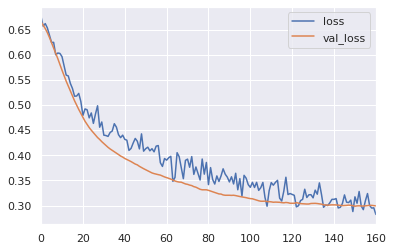

In [71]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [72]:
ann_preds = model.predict_classes(X_test_scaled)

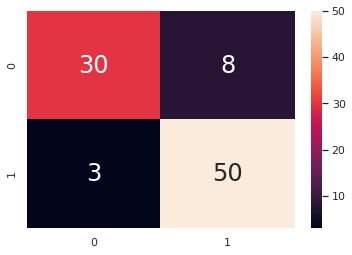

In [73]:
ann_cm = confusion_matrix(y_test, ann_preds)

sns.heatmap(ann_cm, annot=True, annot_kws={'size' : 24})

In [74]:
ann_accu = accuracy_score(y_test, ann_preds)

print('The TF Keras ANN Model achieved an accuracy score of {}'.format(ann_accu))

The TF Keras ANN Model achieved an accuracy score of 0.8791208791208791


In [75]:
# Classifiers compared

cls_scores = pd.DataFrame(data= [log_reg_accu, gnb_accu, dtree_acc, rf_accu, knn_acc,
                    svm_accu, gpc_accu, mlp_accu, ann_accu],
             index= ['Logistic Cls', 'GaussianNP Cls', 'DecisionTree Cls',
                     'RandomForest Cls', 'KNNeighbours Cls', 'SVM Cls',
                     'GaussianProcess Cls', 'MLP Cls', 'ANNs'], 
             columns= ['Accuracy Scores'])

In [76]:
cls_scores = cls_scores.sort_values(by='Accuracy Scores', ascending=False)
cls_scores

,Accuracy Scores
MLP Cls,0.912088
ANNs,0.879121
Logistic Cls,0.846154
SVM Cls,0.835165
RandomForest Cls,0.813187
KNNeighbours Cls,0.813187
GaussianNP Cls,0.802198
DecisionTree Cls,0.758242
GaussianProcess Cls,0.538462


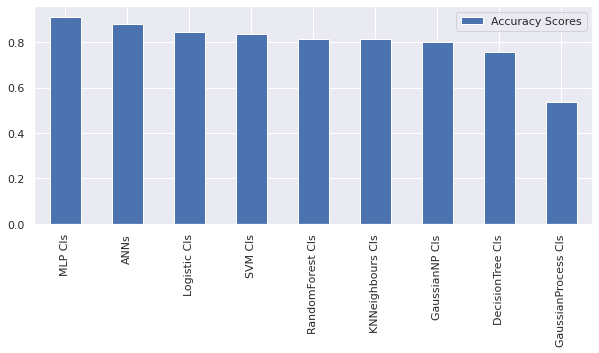

In [77]:
cls_scores.plot(kind='bar', figsize=(10, 4))

# Thank you for viewing this notebook. Please suggest what could I have done better.
### I know ideally I should have done a validation split too, to validate models applying them to test set. But I thought the data set was not big enough and I was a bit lazy ;-)